## Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description
-----------------------------
* Sex / nominal / -- / M, F, and I (infant)
* Length / continuous / mm / Longest shell measurement
* Diameter / continuous / mm / perpendicular to length
* Height / continuous / mm / with meat in shell
* Whole weight / continuous / grams / whole abalone
* Shucked weight / continuous / grams / weight of meat
* Viscera weight / continuous / grams / gut weight (after bleeding)
* Shell weight / continuous / grams / after being dried
* Rings / integer / -- / +1.5 gives the age in years



Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')

In [3]:
df.columns = ['Sex' , 'Length' ,'Diameter' , 'Height' , 'Whole Weight' , 'Shucked Weight' ,'Viscera Weight', 'Shell Weight','Rings']

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [5]:
df.tail()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
df['Rings'].nunique()

28

* There are 28 unique values in Rings column of the given Dataset.

In [7]:
df.shape

(4176, 9)

* In the dataset , there are 4176 observations and 9 columns.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4176.0,0.524009,0.120103,0.0750,0.450000,0.54500,0.61500,0.8150
Diameter,4176.0,0.407892,0.099250,0.0550,0.350000,0.42500,0.48000,0.6500
Height,4176.0,0.139527,0.041826,0.0000,0.115000,0.14000,0.16500,1.1300
Whole Weight,4176.0,0.828818,0.490424,0.0020,0.441500,0.79975,1.15325,2.8255
Shucked Weight,4176.0,0.359400,0.221980,0.0010,0.186000,0.33600,0.50200,1.4880
Viscera Weight,4176.0,0.180613,0.109620,0.0005,0.093375,0.17100,0.25300,0.7600
Shell Weight,4176.0,0.238852,0.139213,0.0015,0.130000,0.23400,0.32900,1.0050
Rings,4176.0,9.932471,3.223601,1.0000,8.000000,9.00000,11.00000,29.0000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole Weight    4176 non-null   float64
 5   Shucked Weight  4176 non-null   float64
 6   Viscera Weight  4176 non-null   float64
 7   Shell Weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [10]:
df.corr()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole Weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked Weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera Weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell Weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


# Checking Missing values

In [11]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

* No missing value present in the Dataset.

## EDA(Exploratory Data Analysis)

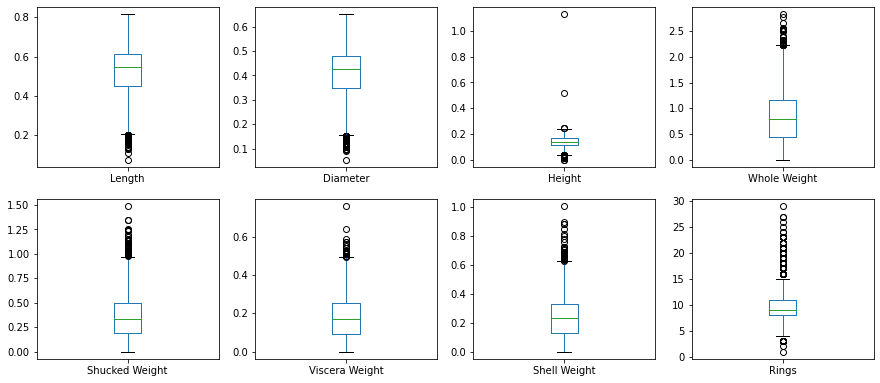

In [12]:
df.plot(kind = 'box',subplots = True , layout = (3,4) , figsize = (15,10))
plt.show()

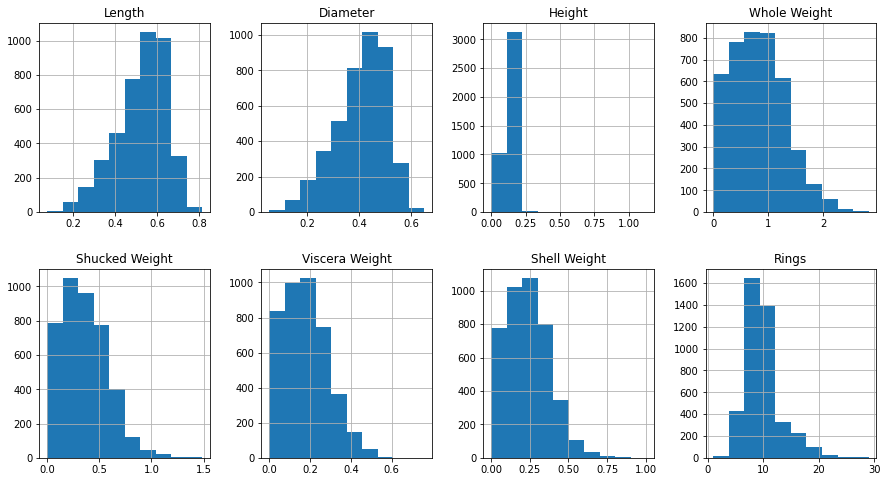

In [13]:
df.hist(figsize = (15 , 8),layout = (2,4))
plt.show()

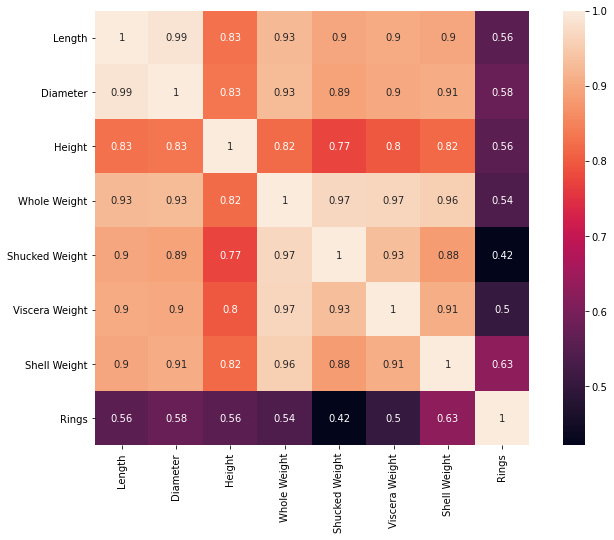

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr() , square = True , annot = True)

* Analyzing the correlation matrix, we notice that Height and Shell weight are the attributes that most correlates to Rings. Therefore, we concentrated the multivariate analysis on the correlation of these two attributes with Rings:
*We tested for many values, and found that the region delimited by Rings < 10 has greater correlation between the independent attributes and the target variable.



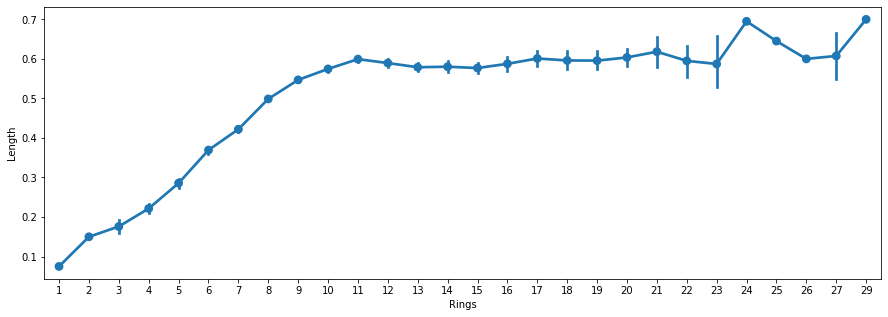

In [15]:
 plt.figure(figsize=(15, 5))
 sns.pointplot(data=df, x='Rings', y='Length')

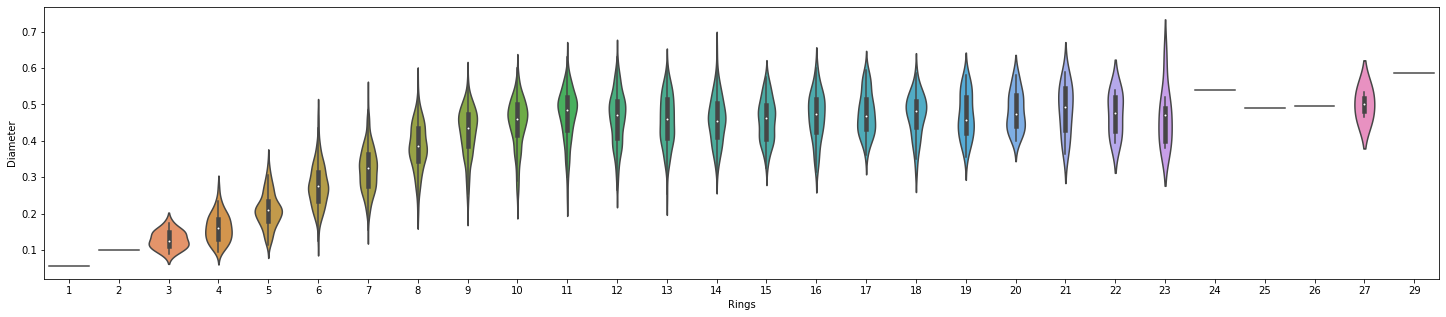

In [16]:
plt.figure(figsize=(25,5))
sns.violinplot(data=df, x='Rings', y='Diameter')

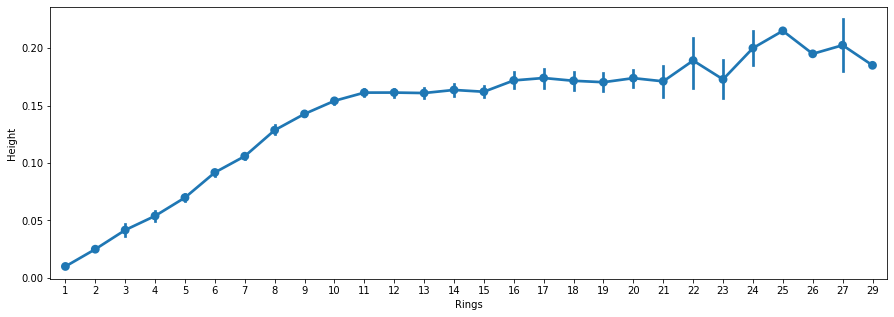

In [17]:
plt.figure(figsize=(15, 5))
sns.pointplot(data=df, x='Rings', y='Height')

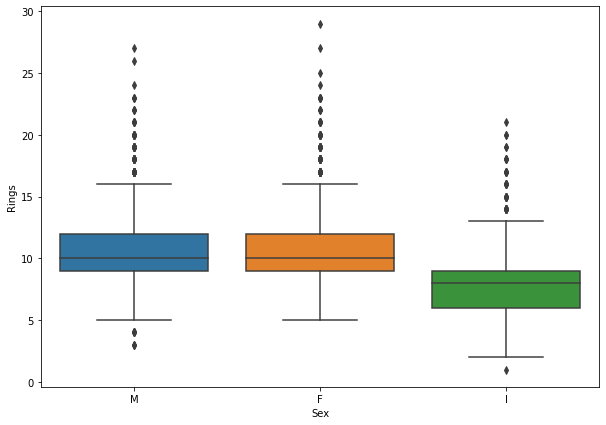

In [18]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Sex', y='Rings')

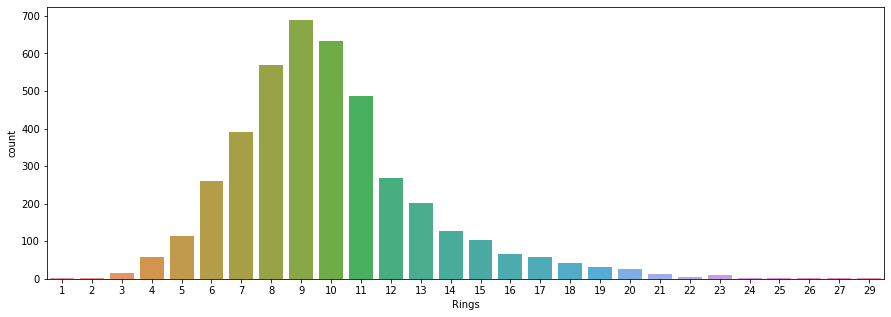

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(df.Rings)

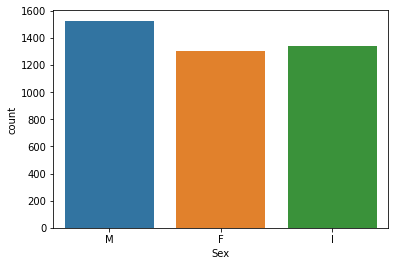

In [20]:
sns.countplot(df.Sex)

## Drop the irrelevant columns

In [21]:
df.drop(['Sex'],axis = 1,inplace = True)

## Outliers Treatment

In [22]:
df.drop(df[(df['Length']<0.22) ].index, inplace=True)

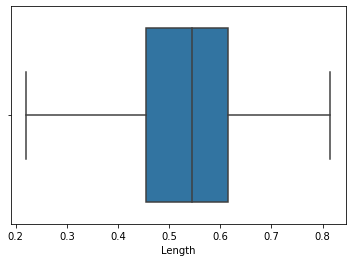

In [23]:
sns.boxplot(df['Length'])

In [24]:
df.drop(df[(df['Diameter']<0.16) ].index, inplace=True)

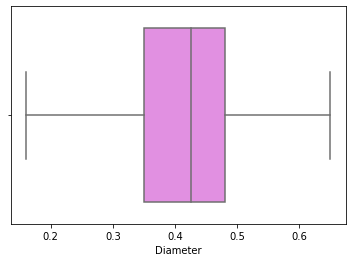

In [25]:
sns.boxplot(df['Diameter'],color = 'violet')

In [26]:
df.drop(df[(df['Whole Weight']>0.2) ].index, inplace=True)

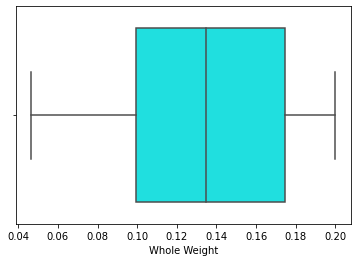

In [27]:
sns.boxplot(df['Whole Weight'],color = 'cyan')

In [28]:
df.drop(df[(df['Shucked Weight']>1.50) ].index, inplace=True)

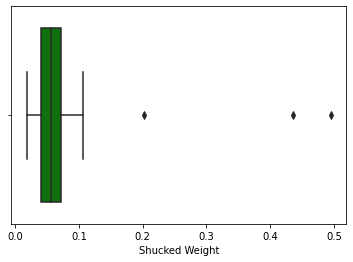

In [29]:
sns.boxplot(df['Shucked Weight'],color = 'green')

## Split Data into Dependent and Independent Variable

In [30]:
X = df.drop(['Rings'] , axis = 1)
y = df['Rings']

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 0)

In [32]:
print('shape of X_train: ',X_train.shape)
print('shape of X_test: ',X_test.shape)
print('shape of y_train: ',y_train.shape)
print('shape of y_test: ',y_test.shape)

shape of X_train:  (252, 7)
shape of X_test:  (85, 7)
shape of y_train:  (252,)
shape of y_test:  (85,)


# Train The Model

## Logistic Regression

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [35]:
accuracy_score(y_train,y_train_pred)

0.3253968253968254

In [36]:
accuracy_score(y_test,y_test_pred)

0.32941176470588235

#Random Forest Classifier
A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [39]:
accuracy_score(y_train,y_train_pred)

0.3253968253968254

In [40]:
accuracy_score(y_test,y_test_pred)

0.32941176470588235

# Decision tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)


In [43]:
print('accuracy on training data: ',accuracy_score(y_train , y_train_pred))
print('accuracy on testing data: ',accuracy_score(y_test,y_test_pred))

accuracy on training data:  0.8809523809523809
accuracy on testing data:  0.8470588235294118


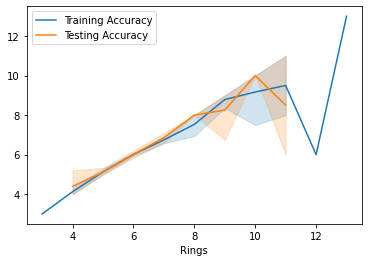

In [44]:
sns.lineplot(y_train , y_train_pred , label = 'Training Accuracy')
sns.lineplot(y_test , y_test_pred , label = 'Testing Accuracy')

## K-Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [46]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [47]:
print('accuracy on training data: ',accuracy_score(y_train , y_train_pred))
print('accuracy on testing data: ',accuracy_score(y_test,y_test_pred))

accuracy on training data:  0.8809523809523809
accuracy on testing data:  0.8470588235294118


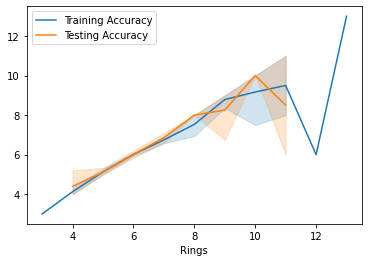

In [48]:
sns.lineplot(y_train , y_train_pred , label = 'Training Accuracy')
sns.lineplot(y_test , y_test_pred , label = 'Testing Accuracy')

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_train_pred)

0.6309523809523809

In [50]:
mean_squared_error(y_test,y_test_pred)

0.6705882352941176